# Implementación de ajuste de parametros
> Por Ana Buendía Ruiz-Azuaga

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Modelo SI

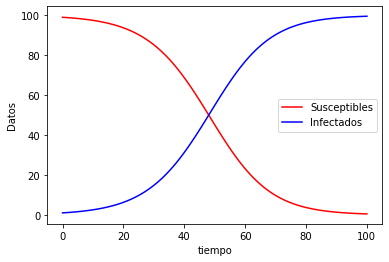

In [42]:
N = 100

S0 = 99
I0 = 1

alfa = 0.1

T0 = 0
T = 100

secciones = 100 #deltaT en realidad es (T-T0)/secciones

deltaT = (T-T0)/secciones

tiempo = np.linspace(T0, T, secciones)

S = np.empty(secciones)
I = np.empty(secciones)

S[0] = S0
I[0] = I0

for j in range (secciones-1):
    S[j+1] = S[j]*(1-(alfa*deltaT/N)*I[j])
    I[j+1] = I[j]*(1+(alfa*deltaT/N)*S[j])

#print(S)
#print(I)

plt.figure()
#  markersize=10.0,
plt.plot(tiempo, S, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles")
plt.plot(tiempo, I, color="blue", marker="", markersize=4.0, linestyle="-", label="Infectados")
#plt.plot(tiempo,S)
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
#plt.savefig("graficaSI.eps", format="eps")
#plt.savefig("graficaSI.jpeg", format="jpeg")
plt.show()


In [50]:
# escribo csv

f = open("datos_SI.csv", "w")

formato = "S,I\n"
f.write(formato)


for i in range (0, len(S)):
    aux = str(S[i]) + "," + str(I[i]) + "\n"
    f.write(aux)

f.close()

# leo csv con pandas
df = pd.read_csv ('datos_SI.csv')
print(df)
print(df['I'].values)

            S          I
0   99.000000   1.000000
1   98.901000   1.099000
2   98.792308   1.207692
3   98.672997   1.327003
4   98.542058   1.457942
..        ...        ...
95   0.721691  99.278309
96   0.650043  99.349957
97   0.585461  99.414539
98   0.527258  99.472742
99   0.474810  99.525190

[100 rows x 2 columns]
[ 1.          1.099       1.2076922   1.3270029   1.45794225  1.60161088
  1.75920681  1.93203268  2.1215032   2.32915275  2.55664307  2.80577095
  3.0784757   3.37684625  3.70312779  4.05972741  4.44921877  4.8743451
  5.33802037  5.84332794  6.39351625  6.99199083  7.64230198  8.34812739
  9.1132489   9.94152249 10.83684087 11.80308783 12.84408373 13.96352162
 15.16489385 16.45140922 17.82590128 19.29072865 20.84766931 22.49781092
 24.24144052 26.07793713 28.00567204 30.02192158 32.12279796 34.30320361
 36.55681419 38.87609494 41.25235368 43.67583236 46.13583727 48.62090552
 51.11900361 53.61775144 56.10466332 58.5673964  60.99399612 63.37312817
 65.69428762 67.9479

In [44]:
from scipy.optimize import least_squares, curve_fit

In [49]:
def solucion_SI(t, alfa, I0):
    N = 100

    T0 = 0
    T = 100

    secciones = 100 #deltaT en realidad es (T-T0)/secciones

    deltaT = (T-T0)/secciones

    tiempo = np.linspace(T0, T, secciones)

    I = np.empty(secciones)
    
    I[0] = I0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1+(alfa*deltaT/N)*(N-I[j]))
        
    return I

T0 = 0
T = 100

secciones = 100 #deltaT en realidad es (T-T0)/secciones

deltaT = (T-T0)/secciones

tiempo = np.linspace(T0, T, secciones)

popt, pcov = curve_fit(solucion_SI, tiempo, df['I'].values+np.random.rand(100)*5)

print(popt)
print("\n")
print(pcov)

[0.10016433 1.14820637]


[[ 2.31456478e-06 -1.12174744e-04]
 [-1.12174744e-04  5.78289086e-03]]


## Modelo SIR

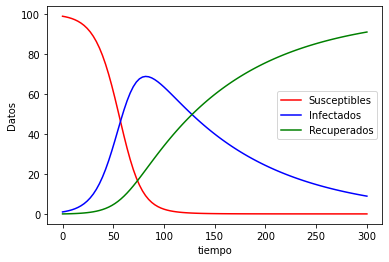

In [6]:
N = 100

S0 = 99
I0 = 1
R0 = 0

alfa = 0.1
gamma = 0.01

T0 = 0
T = 300

secciones = 100 #deltaT en realidad es (T-T0)/secciones

deltaT = (T-T0)/secciones

tiempo = np.linspace(T0, T, secciones)

S = np.linspace(T0, T, secciones)
I = np.linspace(T0, T, secciones)
R = np.linspace(T0, T, secciones)

S[0] = S0
I[0] = I0
R[0] = R0

for j in range (secciones-1):
    S[j+1] = S[j]*(1-(alfa*deltaT/N)*I[j])
    I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*S[j])
    R[j+1] = R[j]+gamma*deltaT*I[j]

#print(S)
#print(I)

plt.figure()
#  markersize=10.0,
plt.plot(tiempo, S, color="red", marker='', markersize=4.0, linestyle='-', label="Susceptibles")
plt.plot(tiempo, I, color="blue", marker="", markersize=4.0, ls="-", label="Infectados")
plt.plot(tiempo, R, color="green", marker="", markersize=4.0, ls="-", label="Recuperados")
#plt.plot(tiempo,S)
plt.legend(loc="best")
plt.xlabel("tiempo")
plt.ylabel("Datos")
#plt.savefig("graficaSIR.eps", format="eps")
#plt.savefig("graficaSIR.jpeg", format="jpeg")
plt.show()